In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
#data downloaded from kaggle
data = pd.read_csv(r"C:\Users\admin\Desktop\SKlearn\01DecisionTree\Taitanic data\data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.drop(['Name','Cabin','Ticket'],inplace=True, axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [5]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [8]:
labels = data['Embarked'].unique().tolist()

In [10]:
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))
data

<ipython-input-10-35807f49b2ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [12]:
data['Sex'] = (data['Sex']=='male').astype(int)

<ipython-input-12-e10e8b18e719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = (data['Sex']=='male').astype(int)


In [13]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0
887,888,1,1,0,19.000000,0,0,30.0000,0
888,889,0,3,0,29.699118,1,2,23.4500,0
889,890,1,1,1,26.000000,0,0,30.0000,1


In [16]:
x = data.iloc[:, data.columns !='Survived']
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [17]:
y = data.iloc[:, data.columns == 'Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [24]:
y = np.ravel(y)
rfc = RandomForestClassifier(n_estimators = 100, random_state=90)
score_pre = cross_val_score(rfc, x, y, cv=10).mean()
score_pre

0.827885597548519

0.8267620020429008 71


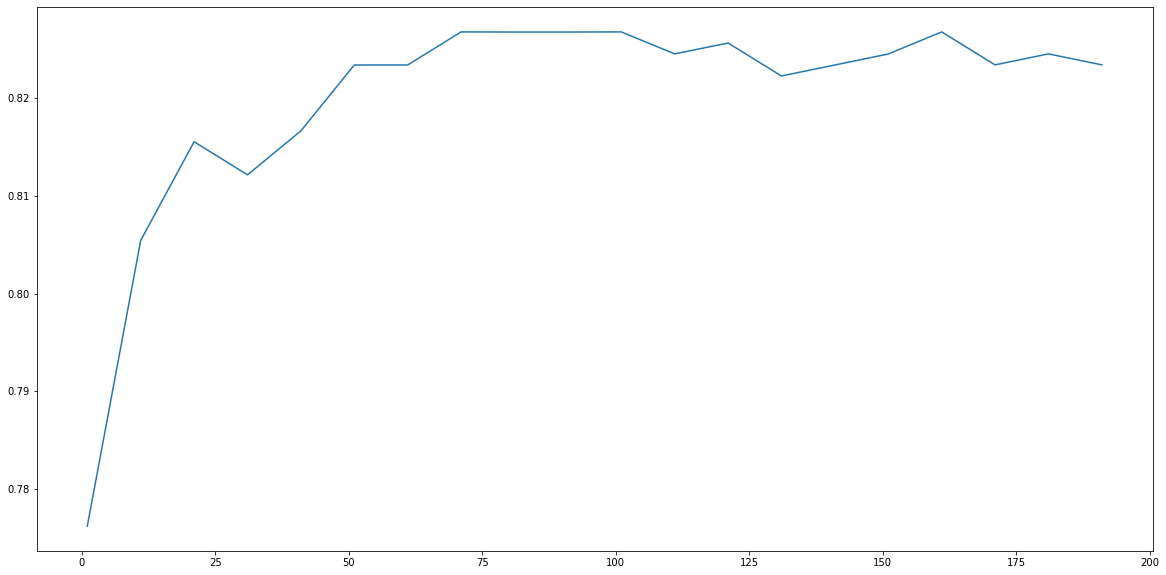

In [23]:
#check n_estimators
scorel=[]
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=90)
    score = cross_val_score(rfc,x,y,cv=10).mean()
    scorel.append(score)

print(max(scorel), (scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,10])
plt.plot(range(1,201,10),scorel)
plt.show()

0.8301327885597548 67


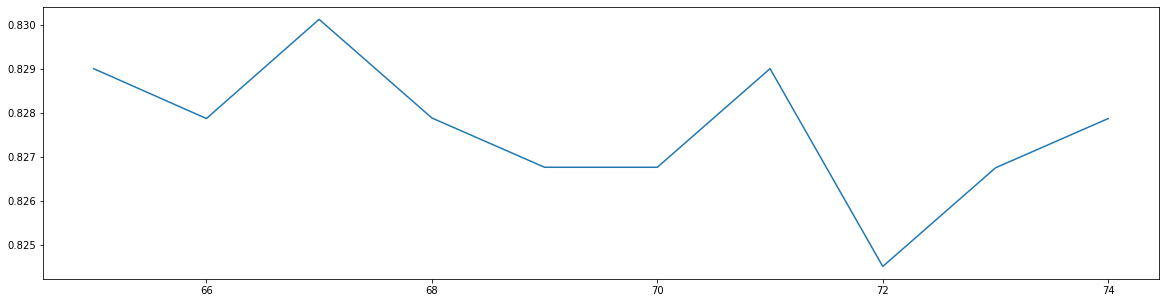

In [26]:
#check n_estimators specify
scorel=[]
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,n_jobs=-1
                                ,random_state=90)
    score = cross_val_score(rfc,x,y,cv=10).mean()
    scorel.append(score)

print(max(scorel), [*range(65,75)][scorel.index(max(scorel))])
plt.figure(figsize=[20,5])
plt.plot(range(65,75),scorel)
plt.show()

In [28]:
param_grid1 = {'max_depth':np.arange(1,20,1)}
rfc1 = RandomForestClassifier(n_estimators=67
                            ,random_state=90)
GS1 = GridSearchCV(rfc1,param_grid1,cv=10)
GS1.fit(x,y)
GS1.best_params_, GS1.best_score_

({'max_depth': 12}, 0.8335035750766089)

In [30]:
param_grid2 = {'min_samples_leaf': np.arange(1,11,1)
              ,'min_samples_split': np.arange(2,12,1)}
rfc2 = RandomForestClassifier(n_estimators=67
                             ,max_depth=12
                             ,random_state=90)
GS2 = GridSearchCV(rfc2,param_grid2,cv=10)
GS2.fit(x,y)
GS2.best_params_,GS2.best_score_

({'min_samples_leaf': 2, 'min_samples_split': 8}, 0.8357763023493361)

In [32]:
param_grid3 = {'criterion':['gini','entropy']}
rfc3 = RandomForestClassifier(n_estimators=67
                             ,max_depth=12
                             ,min_samples_leaf=2
                             ,min_samples_split=8
                             ,random_state=90)
GS3 = GridSearchCV(rfc3,param_grid3,cv=10)
GS3.fit(x,y)
GS3.best_params_,GS3.best_score_

({'criterion': 'gini'}, 0.8357763023493361)

In [33]:
param_grid4 = {'max_features':np.arange(1,8,1)}
rfc4 = RandomForestClassifier(n_estimators=67
                             ,max_depth=12
                             ,min_samples_leaf=2
                             ,min_samples_split=8
                             ,random_state=90)
GS4 = GridSearchCV(rfc4,param_grid4,cv=10)
GS4.fit(x,y)
GS4.best_params_,GS4.best_score_

({'max_features': 3}, 0.8380107252298263)

In [35]:
rfc_final = RandomForestClassifier(n_estimators=67
                                  ,max_depth=12
                                  ,min_samples_leaf=2
                                  ,min_samples_split=8
                                  ,max_features=3
                                  ,random_state=90)
score_after = cross_val_score(rfc_final,x,y,cv=10).mean()
score_after

0.8380107252298263

In [36]:
increase = score_after-score_pre
increase

0.010125127681307355